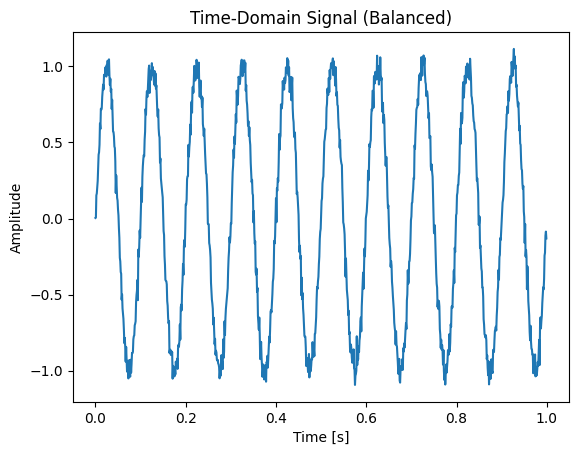

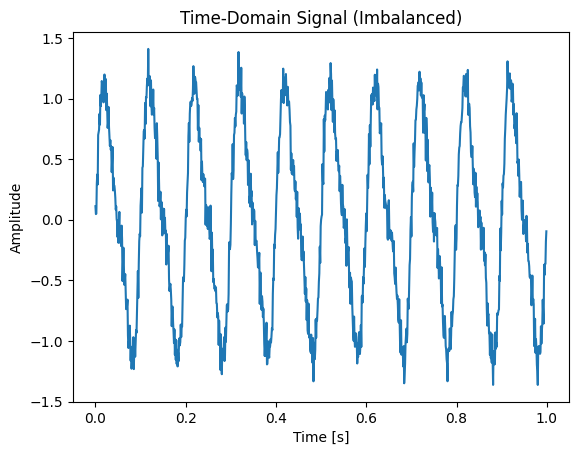

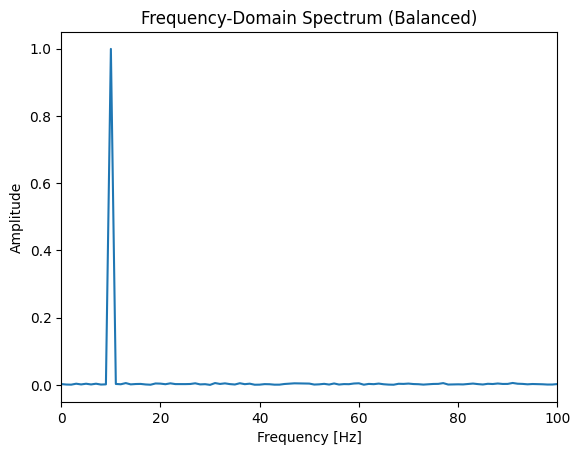

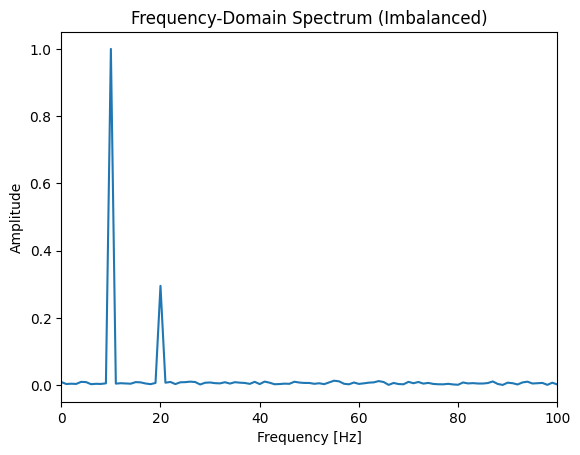

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
fs = 1000.0    # Sampling frequency (Hz)
T = 1.0        # Duration (seconds)
t = np.arange(0, T, 1/fs)  # Time vector

# Fundamental frequency for the rotating shaft (Hz)
f_rot = 10  

##############################################################################
# Balanced Signal: Single clean sinusoid + small random noise
##############################################################################
balanced_signal = 1.0 * np.sin(2 * np.pi * f_rot * t) + 0.05 * np.random.randn(len(t))

# Plot the balanced time-domain signal
plt.figure()
plt.plot(t, balanced_signal)
plt.title("Time-Domain Signal (Balanced)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

##############################################################################
# Imbalanced Signal: Same fundamental + an additional harmonic + noise
##############################################################################
# Add a second harmonic and a slight offset to emulate imbalance
imbalanced_signal = (1.0 * np.sin(2 * np.pi * f_rot * t)
                     + 0.3 * np.sin(2 * np.pi * 2 * f_rot * t)  # second harmonic
                     + 0.1 * np.random.randn(len(t))            # noise
                    )

# Plot the imbalanced time-domain signal
plt.figure()
plt.plot(t, imbalanced_signal)
plt.title("Time-Domain Signal (Imbalanced)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

##############################################################################
# Compute and plot FFT for Balanced Signal
##############################################################################
N = len(balanced_signal)
yf_bal = np.fft.fft(balanced_signal)
xf_bal = np.fft.fftfreq(N, 1/fs)

# Take only the positive frequency half for plotting
xf_bal = xf_bal[:N//2]
yf_bal = 2.0 / N * np.abs(yf_bal[:N//2])

plt.figure()
plt.plot(xf_bal, yf_bal)
plt.title("Frequency-Domain Spectrum (Balanced)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.xlim(0, 100)  # Adjust as needed to focus on the main frequencies
plt.show()

##############################################################################
# Compute and plot FFT for Imbalanced Signal
##############################################################################
yf_imbal = np.fft.fft(imbalanced_signal)
xf_imbal = np.fft.fftfreq(N, 1/fs)

# Take only the positive frequency half for plotting
xf_imbal = xf_imbal[:N//2]
yf_imbal = 2.0 / N * np.abs(yf_imbal[:N//2])

plt.figure()
plt.plot(xf_imbal, yf_imbal)
plt.title("Frequency-Domain Spectrum (Imbalanced)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.xlim(0, 100)  # Adjust as needed to focus on the main frequencies
plt.show()


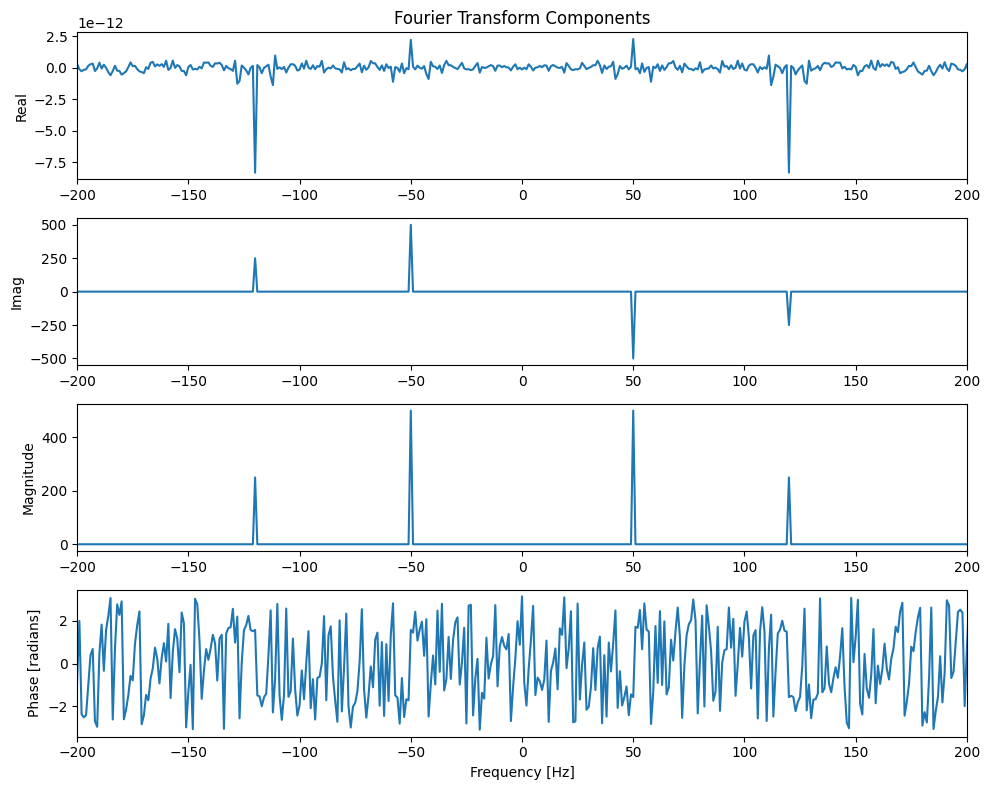

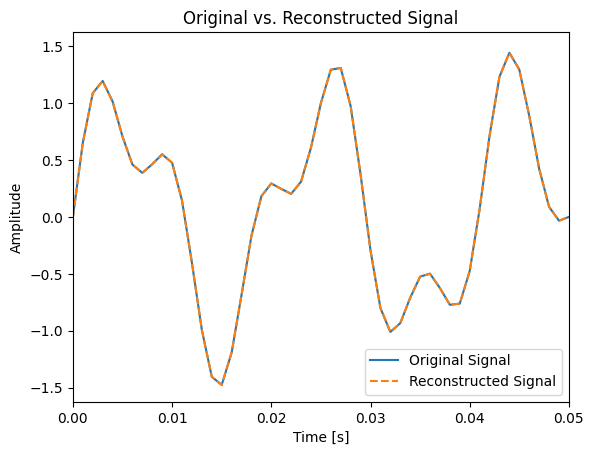

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1) Generate Time-Domain Signal
# ---------------------------
fs = 1000.0          # Sampling frequency (Hz)
T = 1.0              # Duration (seconds)
N = int(fs * T)      # Number of samples
t = np.linspace(0, T, N, endpoint=False)

# Synthesize a signal: sum of two sinusoids (50 Hz and 120 Hz)
f1, f2 = 50.0, 120.0
x = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# ---------------------------
# 2) Compute the Discrete Fourier Transform (DFT)
# ---------------------------
X = np.fft.fft(x)
freqs = np.fft.fftfreq(N, d=1/fs)

# For plotting the spectrum in a more conventional -f to +f order,
# we "shift" the zero-frequency component to the middle.
X_shifted = np.fft.fftshift(X)
freqs_shifted = np.fft.fftshift(freqs)

# ---------------------------
# 3) Plot the Fourier Transform Components
# ---------------------------
# Create a figure with 4 subplots: Real, Imag, Magnitude, Phase
plt.figure(figsize=(10, 8))

# Real part of X
plt.subplot(4, 1, 1)
plt.plot(freqs_shifted, np.real(X_shifted))
plt.title("Fourier Transform Components")
plt.ylabel("Real")
plt.xlim([-200, 200])  # zoom in around main lobes (optional)

# Imag part of X
plt.subplot(4, 1, 2)
plt.plot(freqs_shifted, np.imag(X_shifted))
plt.ylabel("Imag")
plt.xlim([-200, 200])

# Magnitude of X
plt.subplot(4, 1, 3)
plt.plot(freqs_shifted, np.abs(X_shifted))
plt.ylabel("Magnitude")
plt.xlim([-200, 200])

# Phase of X
phase = np.angle(X_shifted)
plt.subplot(4, 1, 4)
plt.plot(freqs_shifted, phase)
plt.ylabel("Phase [radians]")
plt.xlabel("Frequency [Hz]")
plt.xlim([-200, 200])
plt.tight_layout()
plt.show()

# ---------------------------
# 4) Reconstruct the Signal via Inverse FFT
# ---------------------------
x_reconstructed = np.fft.ifft(X)

# ---------------------------
# 5) Compare Original and Reconstructed in One Plot
# ---------------------------
plt.figure()
plt.plot(t, x, label="Original Signal")
plt.plot(t, x_reconstructed.real, "--", label="Reconstructed Signal")
plt.title("Original vs. Reconstructed Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.xlim([0, 0.05])  # zoom in on first 50 ms to see details
plt.legend()
plt.show()


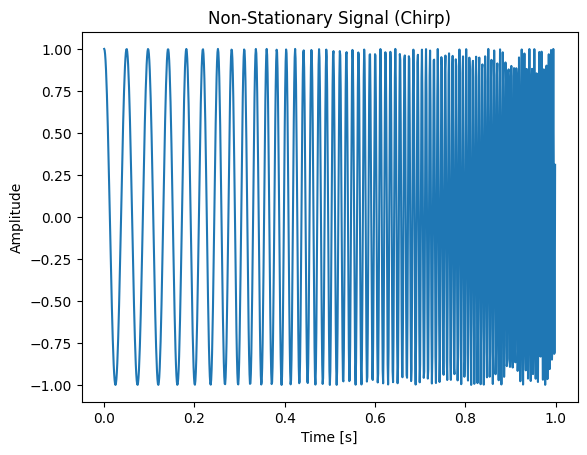

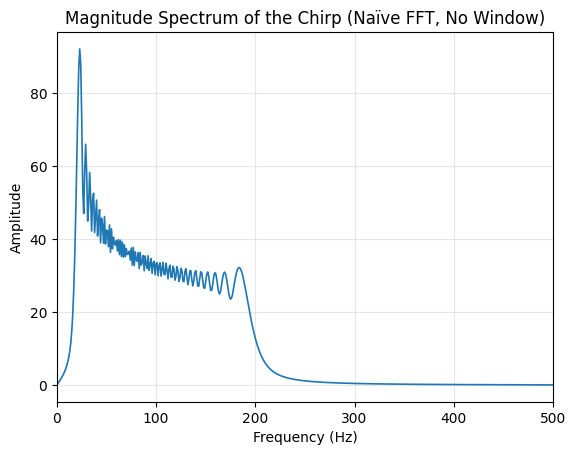

In [31]:
# Noisy-looking magnitude spectrum of a linear chirp (naïve FFT, no window)
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp

# Sampling
fs = 1000        # Hz
T = 1.0          # seconds
N = int(fs * T)
t = np.linspace(0, T, N, endpoint=False)

# Chirp: 20 -> 200 Hz over 1 s
x = chirp(t, f0=20, f1=200, t1=T, method='quadratic') #'linear', 'quadratic', 'logarithmic', 'hyperbolic'

# Naïve FFT (no windowing, no normalization) to emphasize leakage/jaggedness
X = np.fft.rfft(x)
freqs = np.fft.rfftfreq(N, d=1/fs)
mag = np.abs(X)

# Plot the chirp in the time domain
plt.figure()
plt.plot(t, x)
plt.title("Non-Stationary Signal (Chirp)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

# Plot
plt.figure()
plt.plot(freqs, mag, linewidth=1.2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Magnitude Spectrum of the Chirp (Naïve FFT, No Window)")
plt.grid(True, alpha=0.3)
plt.xlim(0, fs/2)
plt.show()


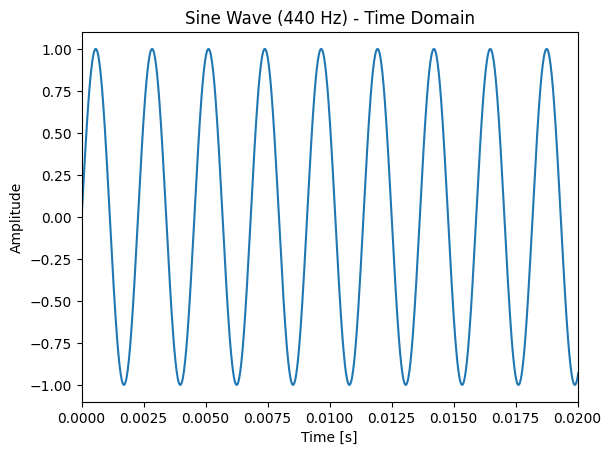

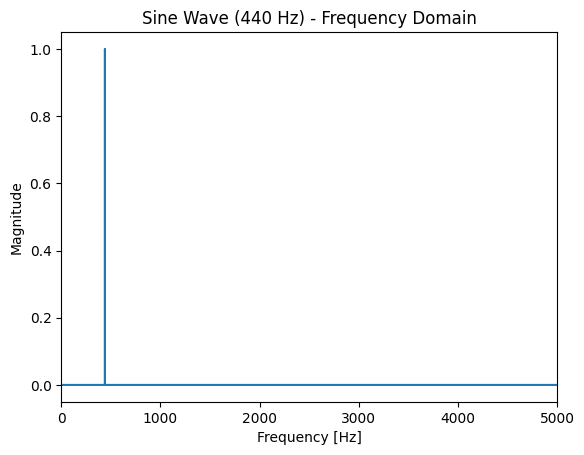

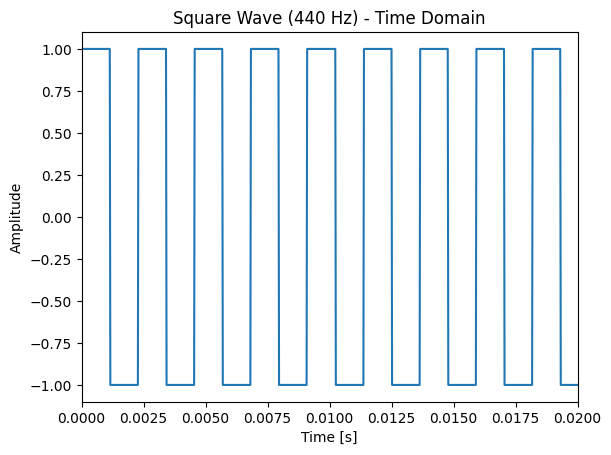

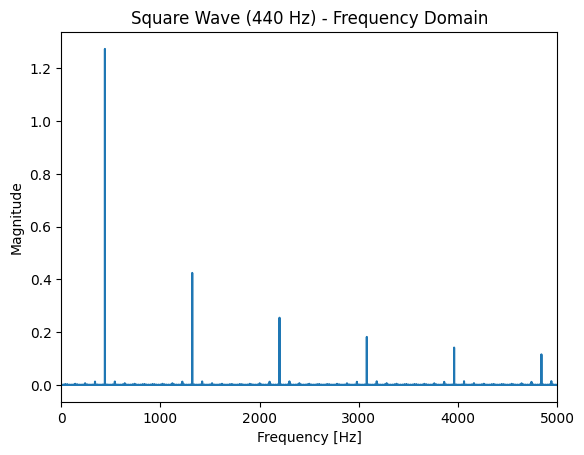

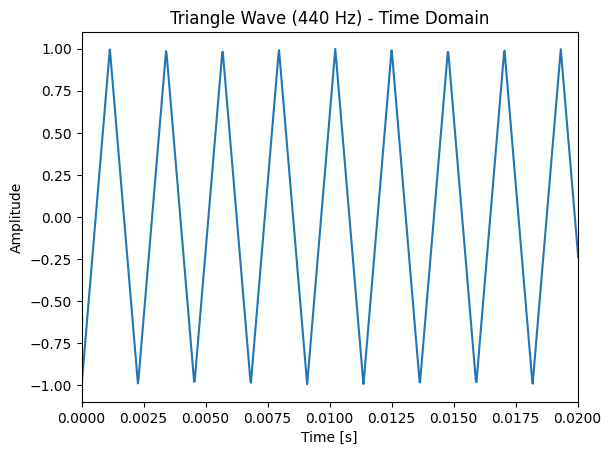

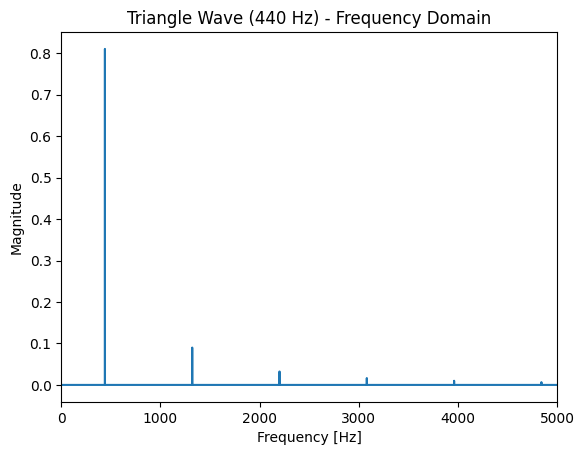

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Sampling parameters
fs = 44100  # Sampling frequency (Hz)
T = 2    # Duration of signal (seconds)
t = np.arange(0, T, 1/fs)

# Frequency of the signals
freq = 440.0  # Hz

# Generate signals
sine_signal = np.sin(2 * np.pi * freq * t)
square_signal = signal.square(2 * np.pi * freq * t)
triangle_signal = signal.sawtooth(2 * np.pi * freq * t, width=0.5)

# Helper function to compute and return FFT frequency axis and magnitude
def compute_fft(sig, fs):
    N = len(sig)
    Y = np.fft.fft(sig)
    X = np.fft.fftfreq(N, 1/fs)
    # Take only positive half of the spectrum
    X = X[:N//2]
    Y = (2.0 / N) * np.abs(Y[:N//2])
    return X, Y

########################################################################
# 1) Sine Wave
########################################################################
# Time-domain plot
plt.figure()
plt.plot(t, sine_signal)
plt.title("Sine Wave (440 Hz) - Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.xlim(0, 0.02)  # show just the first couple of milliseconds for clarity
plt.show()

# FFT and Frequency-domain plot
xf_sine, yf_sine = compute_fft(sine_signal, fs)
plt.figure()
plt.plot(xf_sine, yf_sine)
plt.title("Sine Wave (440 Hz) - Frequency Domain")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.xlim(0, 5000)  # limit to some reasonable range
plt.show()

########################################################################
# 2) Square Wave
########################################################################
# Time-domain plot
plt.figure()
plt.plot(t, square_signal)
plt.title("Square Wave (440 Hz) - Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.xlim(0, 0.02)
plt.show()

# FFT and Frequency-domain plot
xf_square, yf_square = compute_fft(square_signal, fs)
plt.figure()
plt.plot(xf_square, yf_square)
plt.title("Square Wave (440 Hz) - Frequency Domain")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.xlim(0, 5000)
plt.show()

########################################################################
# 3) Triangle Wave
########################################################################
# Time-domain plot
plt.figure()
plt.plot(t, triangle_signal)
plt.title("Triangle Wave (440 Hz) - Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.xlim(0, 0.02)
plt.show()

# FFT and Frequency-domain plot
xf_triangle, yf_triangle = compute_fft(triangle_signal, fs)
plt.figure()
plt.plot(xf_triangle, yf_triangle)
plt.title("Triangle Wave (440 Hz) - Frequency Domain")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.xlim(0, 5000)
plt.show()


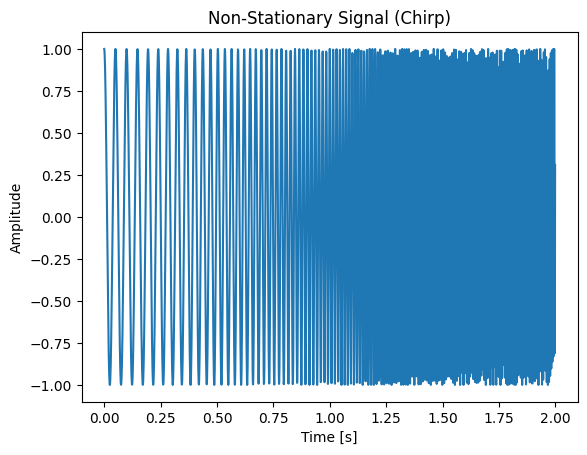

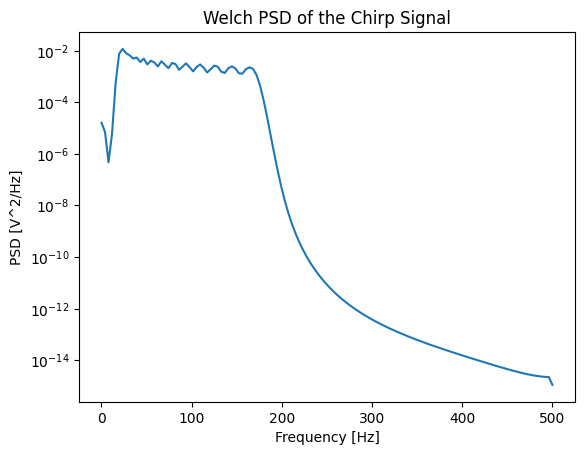

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, welch

# 1) Define sampling parameters
fs = 1000        # Sampling frequency [Hz]
T = 2.0          # Duration of signal [seconds]
N = int(fs * T)  # Total number of samples
t = np.linspace(0, T, N, endpoint=False)

# 2) Generate a non-stationary signal: a linear chirp from 20 Hz up to 200 Hz
f_start = 20
f_end = 200
x = chirp(t, f0=f_start, f1=f_end, t1=T, method='quadratic')

# 3) Plot the chirp in the time domain
plt.figure()
plt.plot(t, x)
plt.title("Non-Stationary Signal (Chirp)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

# 4) Estimate the Power Spectral Density (PSD) using Welch’s method
#    - welch automatically applies windowing and averaging over segments
f, Pxx = welch(x, fs=fs, nperseg=256)

# 5) Plot Welch’s PSD estimate
plt.figure()
plt.semilogy(f, Pxx)  # semilogy gives a log-scale on the y-axis
plt.title("Welch PSD of the Chirp Signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD [V^2/Hz]")
plt.show()



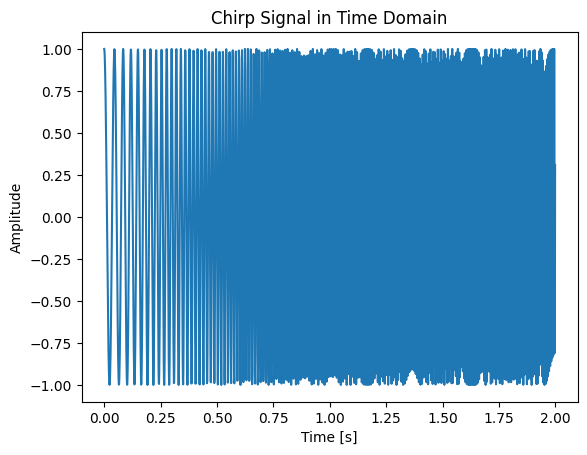

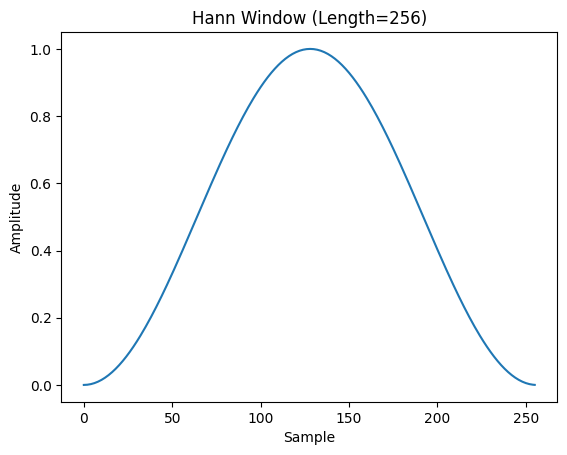

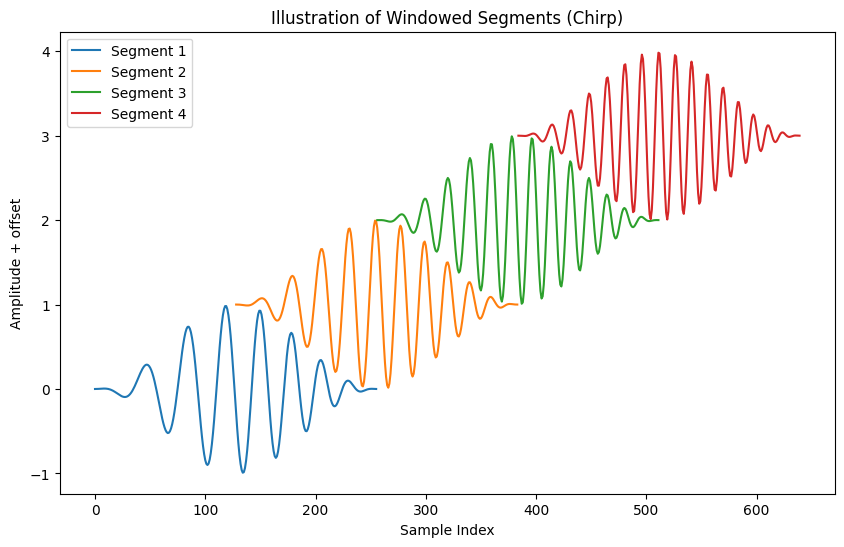

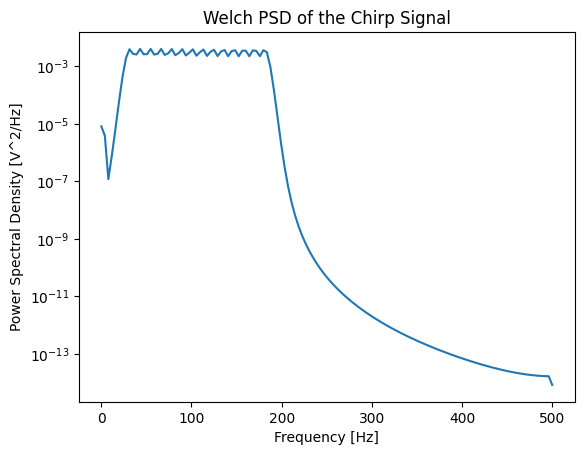

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, welch, get_window

# ---------------------------------------------------
# 1) Generate a Non-Stationary (Chirp) Signal
# ---------------------------------------------------
fs = 1000        # Sampling frequency [Hz]
T = 2.0          # Duration [seconds]
N = int(fs * T)  # Number of samples
t = np.linspace(0, T, N, endpoint=False)

# Create a linear chirp going from 20 Hz at t=0 to 200 Hz at t=2s
f_start = 20.0
f_end = 200.0
x = chirp(t, f0=f_start, f1=f_end, t1=T, method='linear')

# Plot the chirp in time domain
plt.figure()
plt.plot(t, x)
plt.title("Chirp Signal in Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

# ---------------------------------------------------
# 2) Welch Parameters
# ---------------------------------------------------
nperseg = 256
noverlap = 128
window_type = 'hann'
win = get_window(window_type, nperseg)
step = nperseg - noverlap

# ---------------------------------------------------
# 3) Show the Window Shape
# ---------------------------------------------------
plt.figure()
plt.plot(win)
plt.title(f"{window_type.capitalize()} Window (Length={nperseg})")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

# ---------------------------------------------------
# 4) Illustrate Windowed Segments
# ---------------------------------------------------
num_segments_to_show = 4  # How many overlapping segments to visualize
plt.figure(figsize=(10, 6))

for i in range(num_segments_to_show):
    start_idx = i * step
    end_idx = start_idx + nperseg
    if end_idx > N:
        break  # avoid going out of range
    
    # Extract the segment and apply the window
    segment = x[start_idx:end_idx]
    windowed_segment = segment * win
    
    # Shift each segment upward so they don't overlap visually
    vertical_offset = i * 1.0
    plt.plot(
        np.arange(start_idx, end_idx), 
        windowed_segment + vertical_offset, 
        label=f"Segment {i+1}"
    )

plt.title("Illustration of Windowed Segments (Chirp)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude + offset")
plt.legend()
plt.show()

# ---------------------------------------------------
# 5) Compute Welch PSD
# ---------------------------------------------------
frequencies, psd = welch(
    x, 
    fs=fs, 
    window=win, 
    noverlap=noverlap, 
    nperseg=nperseg
)

# ---------------------------------------------------
# 6) Plot Welch PSD
# ---------------------------------------------------
plt.figure()
plt.semilogy(frequencies, psd)
plt.title("Welch PSD of the Chirp Signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power Spectral Density [V^2/Hz]")
plt.show()


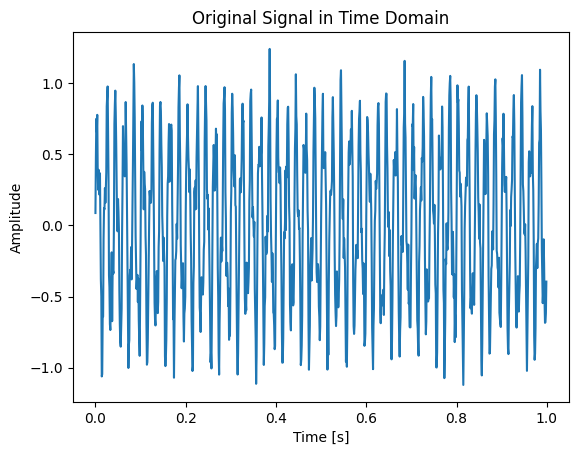

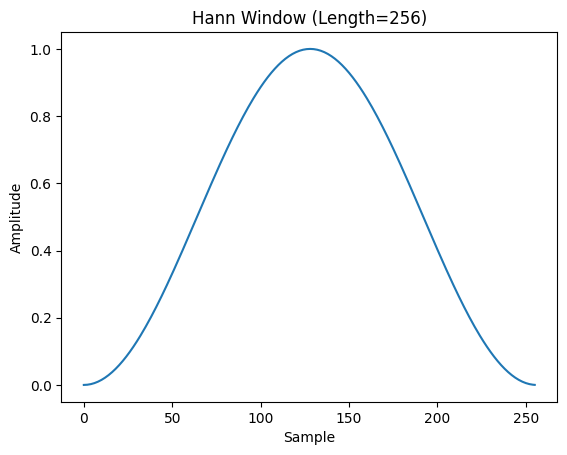

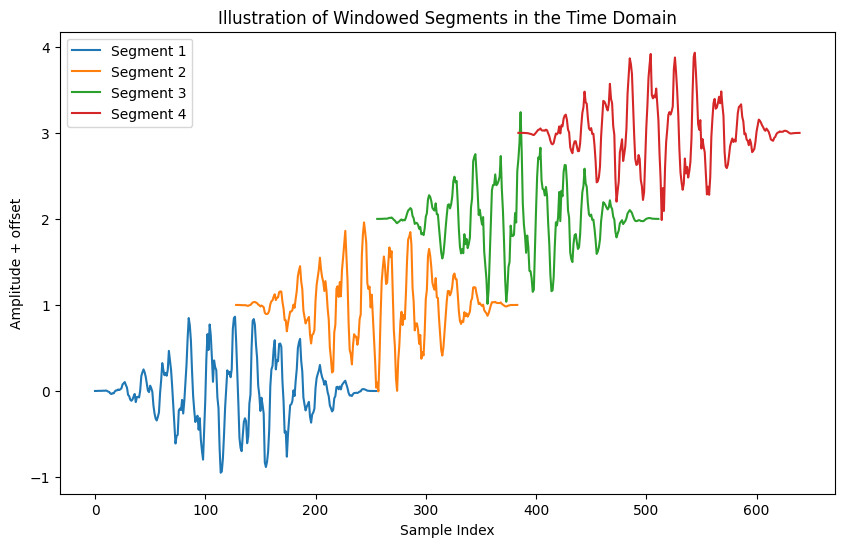

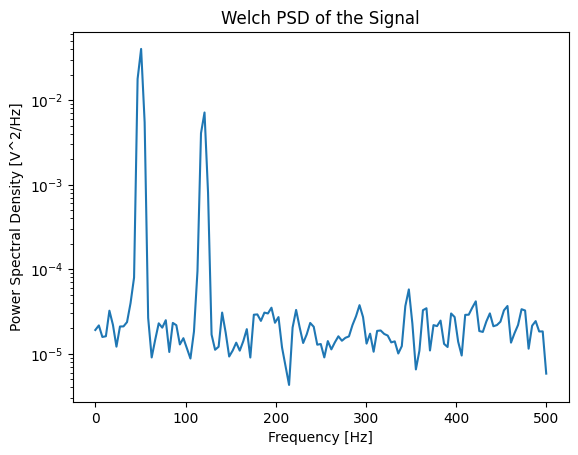

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, get_window

# -------------------------------
# 1) Create a Sample Signal
# -------------------------------
fs = 1000        # Sampling frequency [Hz]
T = 1.0          # Duration [s]
N = int(fs * T)  # Number of samples
t = np.linspace(0, T, N, endpoint=False)

# Signal: sum of two sinusoids + noise
x = 0.7 * np.sin(2 * np.pi * 50 * t) \
  + 0.3 * np.sin(2 * np.pi * 120 * t) \
  + 0.1 * np.random.randn(N)

# Plot the original signal
plt.figure()
plt.plot(t, x)
plt.title("Original Signal in Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

# -------------------------------
# 2) Welch Parameters
# -------------------------------
nperseg = 256      # Samples per segment
noverlap = 128     # Overlap between segments
window_type = 'hann'
win = get_window(window_type, nperseg)
step = nperseg - noverlap  # Step size when sliding

# -------------------------------
# 3) Show the Window Shape
# -------------------------------
plt.figure()
plt.plot(win)
plt.title(f"{window_type.capitalize()} Window (Length={nperseg})")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

# -------------------------------
# 4) Illustrate Windowed Segments
# -------------------------------
# We'll plot the first few segments (windowed) on top of each other, 
# offset vertically so you can see how each segment is tapered by the window.

num_segments_to_show = 4
plt.figure(figsize=(10, 6))
for i in range(num_segments_to_show):
    start_idx = i * step
    end_idx = start_idx + nperseg
    # Avoid going beyond the signal length
    if end_idx > N:
        break
    # Extract the segment and apply the window
    segment = x[start_idx:end_idx]
    windowed_segment = segment * win
    
    vertical_offset = i * 1.0  # Shift each windowed segment up in the plot
    plt.plot(
        np.arange(start_idx, end_idx),
        windowed_segment + vertical_offset,
        label=f"Segment {i+1}"
    )

plt.title("Illustration of Windowed Segments in the Time Domain")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude + offset")
plt.legend()
plt.show()

# -------------------------------
# 5) Compute Welch PSD
# -------------------------------
# Welch automatically segments and windows the signal under the hood.
f, Pxx = welch(
    x,
    fs=fs,
    window=win,
    noverlap=noverlap,
    nperseg=nperseg
)

# -------------------------------
# 6) Plot the Welch PSD
# -------------------------------
plt.figure()
plt.semilogy(f, Pxx)
plt.title("Welch PSD of the Signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power Spectral Density [V^2/Hz]")
plt.show()


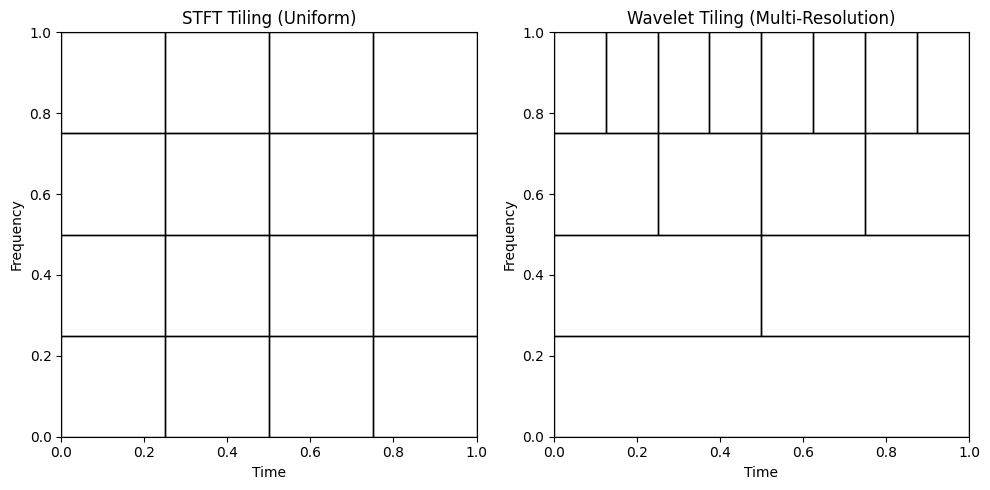

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def plot_stft_tiling(ax, num_time_bins=4, num_freq_bins=4):
    """
    Draws uniform rectangular tiling to mimic STFT segmentation.
    """
    ax.set_title("STFT Tiling (Uniform)")
    ax.set_xlabel("Time")
    ax.set_ylabel("Frequency")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    width = 1 / num_time_bins
    height = 1 / num_freq_bins
    
    for i in range(num_time_bins):
        for j in range(num_freq_bins):
            # Rectangle: (x_start, y_start, width, height)
            rect = Rectangle(
                (i * width, j * height),  # bottom-left corner
                width,
                height,
                fill=False,
                edgecolor='black'
            )
            ax.add_patch(rect)

def plot_wavelet_tiling(ax):
    """
    Draws a simplified 'wavelet-like' multi-resolution tiling:
      - Low frequency band = coarse time resolution
      - High frequency band = fine time resolution
    We'll break the [0,1] frequency axis into 4 sub-bands:
      (0 -> 0.25), (0.25 -> 0.5), (0.5 -> 0.75), (0.75 -> 1.0)
    And for each higher sub-band, we subdivide time more finely.
    """
    ax.set_title("Wavelet Tiling (Multi-Resolution)")
    ax.set_xlabel("Time")
    ax.set_ylabel("Frequency")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    freq_bands = [
        (0.00, 0.25),
        (0.25, 0.50),
        (0.50, 0.75),
        (0.75, 1.00)
    ]
    # Number of time subdivisions for each band (lowest freq -> few subdivisions, highest -> many)
    time_divisions = [1, 2, 4, 8]
    
    for (f_low, f_high), t_div in zip(freq_bands, time_divisions):
        freq_height = f_high - f_low
        time_width = 1.0 / t_div
        
        for i in range(t_div):
            rect = Rectangle(
                (i * time_width, f_low),  # bottom-left corner in (time, freq)
                time_width,
                freq_height,
                fill=False,
                edgecolor='black'
            )
            ax.add_patch(rect)

# -----------------------------
# Main plotting
# -----------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 1) STFT tiling: uniform rectangles in time-frequency plane
plot_stft_tiling(ax1, num_time_bins=4, num_freq_bins=4)

# 2) Wavelet tiling: multi-resolution approach
plot_wavelet_tiling(ax2)

plt.tight_layout()
plt.show()


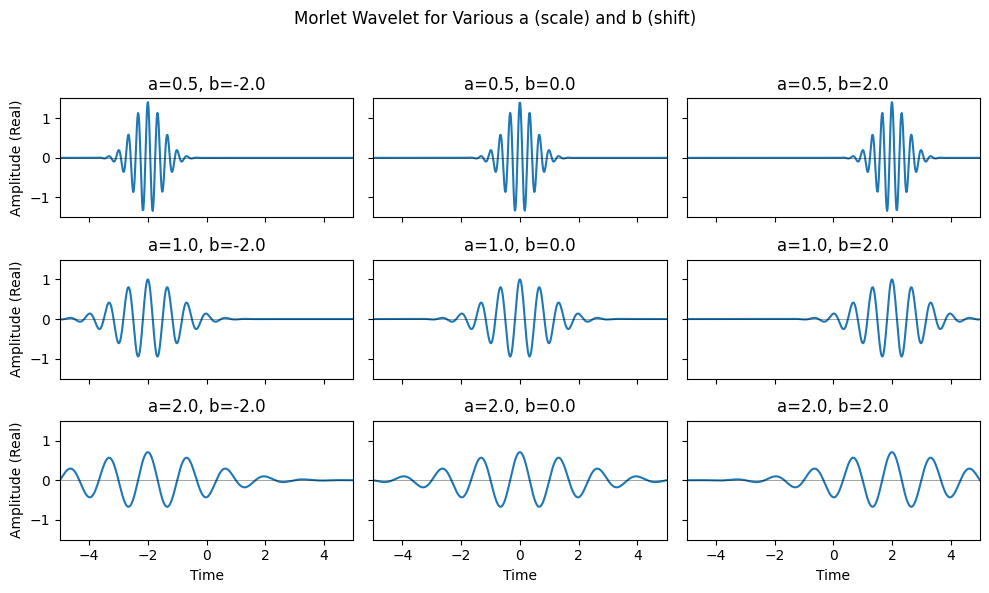

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def morlet_wavelet(t, f0=1.0):
    """
    A basic Morlet wavelet centered at t=0, scale=1.
    f0 controls the wavelet's center frequency.
    """
    # Morlet typically has a Gaussian envelope multiplied by a complex exponential.
    # Normalization is omitted or simplified for demonstration purposes.
    return np.exp(2j * np.pi * f0 * t) * np.exp(-t**2 / 2)

def psi_a_b(t, a, b, f0=1.0):
    """
    Returns the Morlet wavelet scaled by 'a' and shifted by 'b', i.e.:
        psi_{a,b}(t) = 1/sqrt(|a|) * psi((t - b)/a)
    """
    return (1.0 / np.sqrt(np.abs(a))) * morlet_wavelet((t - b)/a, f0=f0)

# -----------------------------------
# 1) Set Up Time Axis
# -----------------------------------
N = 500
t = np.linspace(-5, 5, N)

# We'll demo 3 scales and 3 shifts
a_values = [0.5, 1.0, 2.0]
b_values = [-2.0, 0.0, 2.0]

# Set a central frequency for the Morlet wavelet
f0 = 1.5  # you can adjust for more or fewer oscillations

# -----------------------------------
# 2) Plot the Real Part of Each Wavelet
# -----------------------------------
fig, axes = plt.subplots(len(a_values), len(b_values), figsize=(10, 6), sharex=True, sharey=True)
fig.suptitle("Morlet Wavelet for Various a (scale) and b (shift)")

for i, a in enumerate(a_values):
    for j, b in enumerate(b_values):
        ax = axes[i, j]
        
        # Compute wavelet
        wv = psi_a_b(t, a, b, f0=f0)
        
        # Plot its real part
        ax.plot(t, wv.real)
        ax.axhline(0, color='black', linewidth=0.5, alpha=0.5)
        
        ax.set_title(f"a={a}, b={b}")
        ax.set_xlim([-5, 5])
        ax.set_ylim([-1.5, 1.5])  # adjust as needed

        if i == len(a_values) - 1:
            ax.set_xlabel("Time")
        if j == 0:
            ax.set_ylabel("Amplitude (Real)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


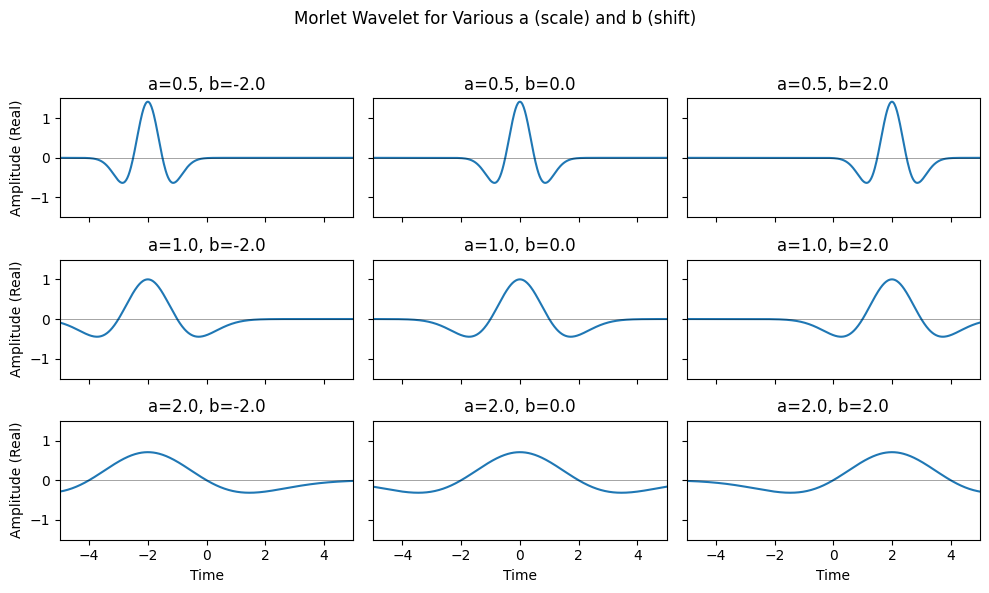

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat_wavelet(t):
    """
    A simplified version of the Mexican Hat (Ricker) wavelet:
       ψ(t) = (1 - t^2) * exp(-t^2 / 2)
    Omitting normalizing constants for demonstration.
    """
    return (1.0 - t**2) * np.exp(-t**2 / 2)

def psi_a_b(t, a, b):
    """
    Returns the Morlet wavelet scaled by 'a' and shifted by 'b', i.e.:
        psi_{a,b}(t) = 1/sqrt(|a|) * psi((t - b)/a)
    """
    return (1.0 / np.sqrt(np.abs(a))) * mexican_hat_wavelet((t - b)/a)

# -----------------------------------
# 1) Set Up Time Axis
# -----------------------------------
N = 500
t = np.linspace(-5, 5, N)

# We'll demo 3 scales and 3 shifts
a_values = [0.5, 1.0, 2.0]
b_values = [-2.0, 0.0, 2.0]

# -----------------------------------
# 2) Plot the Real Part of Each Wavelet
# -----------------------------------
fig, axes = plt.subplots(len(a_values), len(b_values), figsize=(10, 6), sharex=True, sharey=True)
fig.suptitle("Morlet Wavelet for Various a (scale) and b (shift)")

for i, a in enumerate(a_values):
    for j, b in enumerate(b_values):
        ax = axes[i, j]
        
        # Compute wavelet
        wv = psi_a_b(t, a, b)
        
        # Plot its real part
        ax.plot(t, wv.real)
        ax.axhline(0, color='black', linewidth=0.5, alpha=0.5)
        
        ax.set_title(f"a={a}, b={b}")
        ax.set_xlim([-5, 5])
        ax.set_ylim([-1.5, 1.5])  # adjust as needed

        if i == len(a_values) - 1:
            ax.set_xlabel("Time")
        if j == 0:
            ax.set_ylabel("Amplitude (Real)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


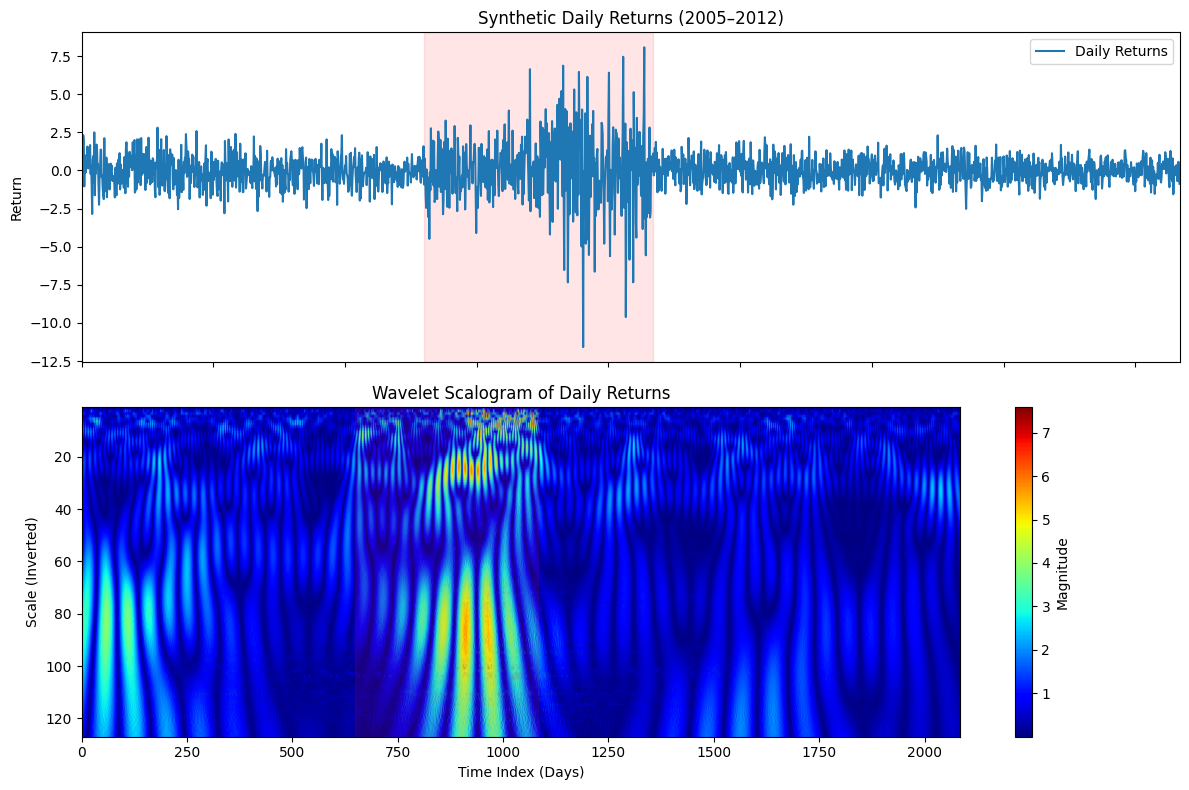

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

# -------------------------------------------------
# 1) Create a Synthetic Daily "Stock Price" Series
# -------------------------------------------------
dates = pd.date_range('2005-01-01', '2012-12-31', freq='B')  # business days
N = len(dates)

np.random.seed(0)  # reproducibility

# Let's simulate a random walk for the "price"
price = np.zeros(N)
price[0] = 100.0  # start price

# We'll add a "volatility boost" during the 2007–2009 crisis window
crisis_start = pd.to_datetime('2007-07-01')
crisis_end   = pd.to_datetime('2009-03-01')

for i in range(1, N):
    current_date = dates[i]
    
    # baseline daily return noise
    daily_ret = np.random.normal(0, 0.01)
    
    # if inside crisis window, increase volatility
    if crisis_start <= current_date <= crisis_end:
        daily_ret += np.random.normal(0, 0.03)  # extra volatility
    
    price[i] = price[i - 1] * (1 + daily_ret)

# Convert to "daily returns" to highlight volatility changes
returns = np.diff(price)  # length N-1
time_idx = np.arange(len(returns))  # numeric index for plotting

# -------------------------------------------------
# 2) Continuous Wavelet Transform (Morlet)
# -------------------------------------------------
scales = np.arange(1, 128)  # range of scales
coeffs, freqs = pywt.cwt(returns, scales, 'morl')

# We'll take the absolute value for magnitude
cwt_magnitude = np.abs(coeffs)

# -------------------------------------------------
# 3) Plot Original Data and Wavelet Scalogram
# -------------------------------------------------
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# (A) Plot the daily returns
axes[0].plot(time_idx, returns, label='Daily Returns')
axes[0].set_title("Synthetic Daily Returns (2005–2012)")
axes[0].set_ylabel("Return")
axes[0].legend()

# Mark the crisis region with a vertical span
start_idx = np.searchsorted(time_idx, np.where(dates[1:] >= crisis_start)[0][0])
end_idx   = np.searchsorted(time_idx, np.where(dates[1:] >= crisis_end)[0][0])
axes[0].axvspan(start_idx, end_idx, color='red', alpha=0.1, label='Crisis')

# (B) Plot the wavelet scalogram
im = axes[1].imshow(
    cwt_magnitude,
    extent=[0, len(returns), scales.max(), scales.min()],
    aspect='auto',
    cmap='jet'
)
axes[1].set_title("Wavelet Scalogram of Daily Returns")
axes[1].set_xlabel("Time Index (Days)")
axes[1].set_ylabel("Scale (Inverted)")

# Add a vertical span in the scalogram for the crisis
axes[1].axvspan(start_idx, end_idx, color='red', alpha=0.1, label='Crisis')

# Add colorbar
cbar = plt.colorbar(im, ax=axes[1])
cbar.set_label("Magnitude")

plt.tight_layout()
plt.show()


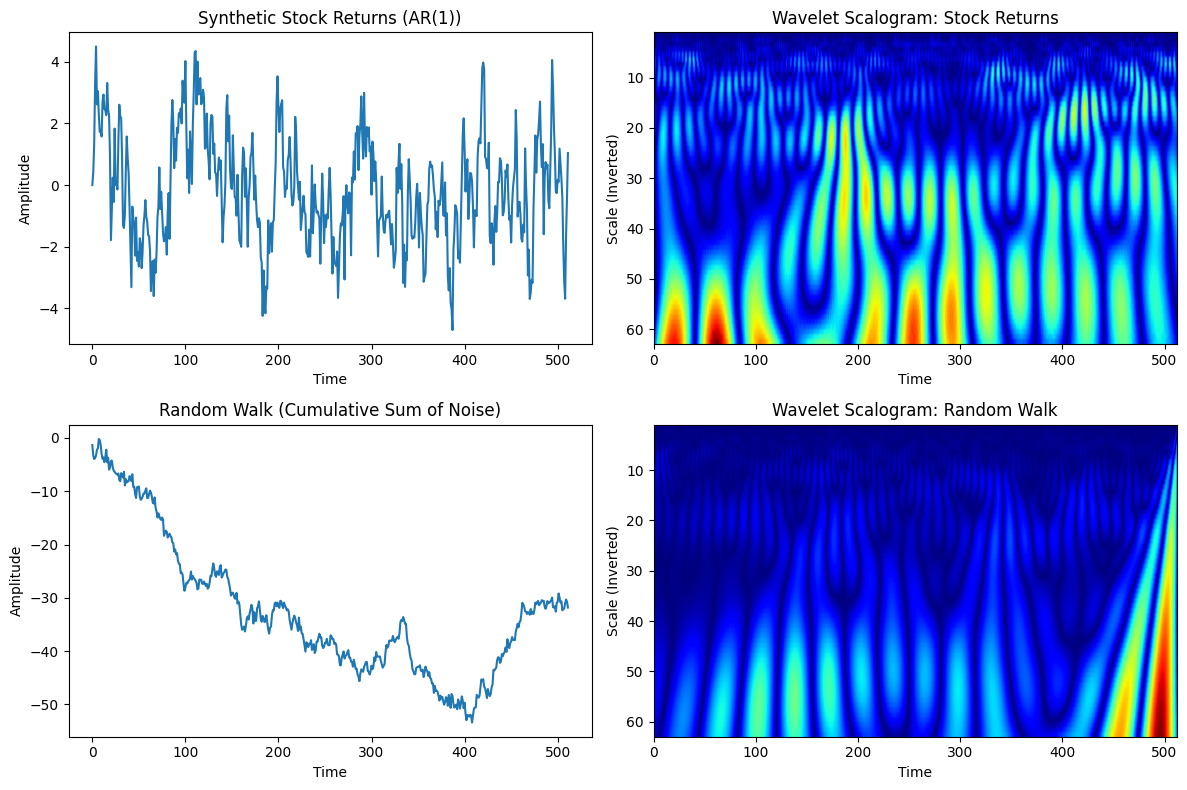

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# -----------------------------
# 1) Generate Synthetic Data
# -----------------------------
np.random.seed(0)   # for reproducibility
N = 512             # number of data points
time = np.arange(N)

# -- A) Synthetic "Stock Returns" (AR(1) process) --
alpha = 0.8
stock_returns = np.zeros(N)
noise = np.random.normal(0, 1, N)
for i in range(1, N):
    stock_returns[i] = alpha * stock_returns[i - 1] + noise[i]

# -- B) Random Walk --
#    Typically, random walks are used to model *prices* rather than *returns*,
#    but we'll demonstrate here for comparison.
random_walk = np.cumsum(np.random.normal(0, 1, N))

# -----------------------------
# 2) Continuous Wavelet Transform (CWT)
#    We'll use Morlet ('morl') wavelet for illustration.
# -----------------------------
scales = np.arange(1, 64)  # range of scales
coeffs_stock, freqs_stock = pywt.cwt(stock_returns, scales, 'morl')
coeffs_walk,  freqs_walk  = pywt.cwt(random_walk,  scales, 'morl')

# -----------------------------
# 3) Plot Time Series and Their Scalograms
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# (A) Stock Returns: Time-Domain
axes[0, 0].plot(time, stock_returns)
axes[0, 0].set_title("Synthetic Stock Returns (AR(1))")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")

# (A) Stock Returns: Wavelet Scalogram
#   We plot the absolute value of coefficients as an intensity map.
axes[0, 1].imshow(np.abs(coeffs_stock),
                  extent=[0, N, scales.max(), scales.min()],
                  aspect='auto', cmap='jet')
axes[0, 1].set_title("Wavelet Scalogram: Stock Returns")
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Scale (Inverted)")

# (B) Random Walk: Time-Domain
axes[1, 0].plot(time, random_walk)
axes[1, 0].set_title("Random Walk (Cumulative Sum of Noise)")
axes[1, 0].set_xlabel("Time")
axes[1, 0].set_ylabel("Amplitude")

# (B) Random Walk: Wavelet Scalogram
axes[1, 1].imshow(np.abs(coeffs_walk),
                  extent=[0, N, scales.max(), scales.min()],
                  aspect='auto', cmap='jet')
axes[1, 1].set_title("Wavelet Scalogram: Random Walk")
axes[1, 1].set_xlabel("Time")
axes[1, 1].set_ylabel("Scale (Inverted)")

plt.tight_layout()
plt.show()


/var/folders/yp/6mn1n00s6zg4_6vww8ksl5tw0000gn/T/ipykernel_38055/2093451055.py:11: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  macro['quarter'] = pd.PeriodIndex(
/Users/ashkan/Documents/projects.nosync/sandbox/lib/python3.12/site-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


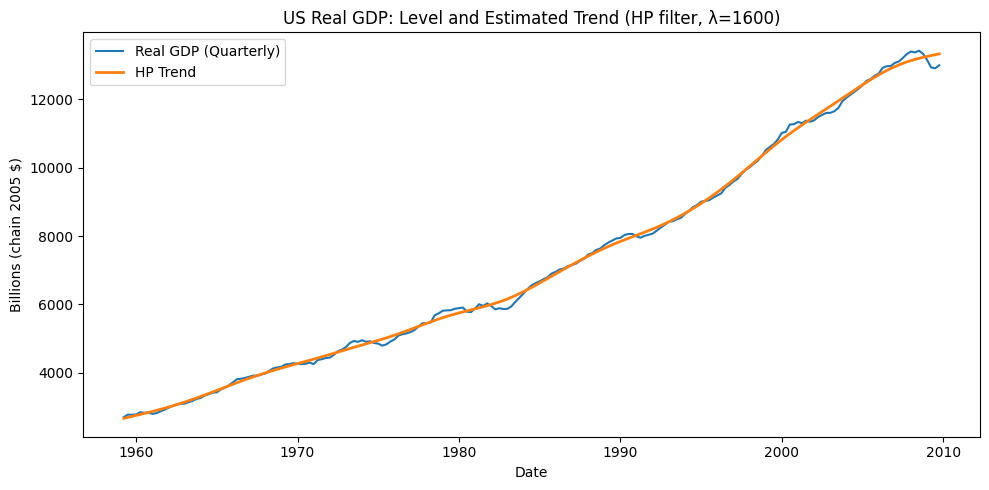

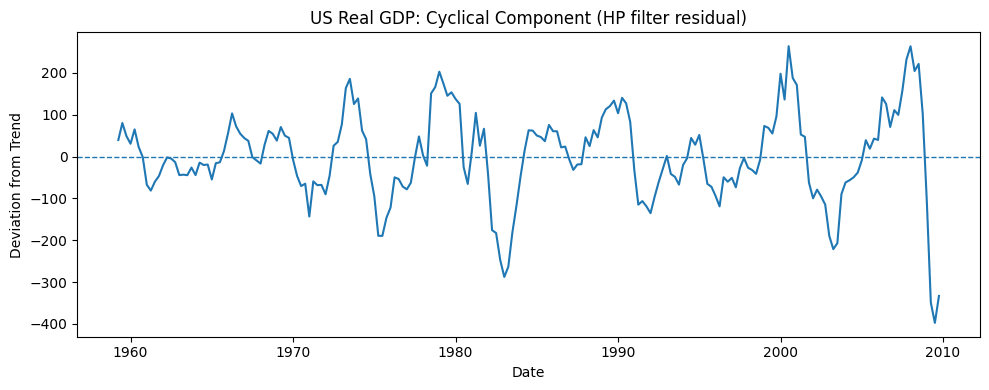

In [1]:
# Real GDP decomposition into trend and cycle using HP filter
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter

# 1) Load quarterly US macro data from statsmodels (1959Q1–2009Q3)
macro = sm.datasets.macrodata.load_pandas().data.copy()

# Build a proper quarterly index and select real GDP
macro['quarter'] = pd.PeriodIndex(
    year=macro['year'].astype(int),
    quarter=macro['quarter'].astype(int),
    freq='Q'
)
gdp = macro.set_index(macro['quarter'].astype(str))['realgdp'].astype(float)
gdp.index = pd.PeriodIndex(gdp.index, freq='Q').to_timestamp(how='end')

# 2) HP filter (λ=1600 for quarterly data)
cycle, trend = hpfilter(gdp, lamb=1600)

# 3) Plot: GDP level + trend
plt.figure(figsize=(10, 5))
plt.plot(gdp.index, gdp.values, label='Real GDP (Quarterly)')
plt.plot(trend.index, trend.values, label='HP Trend', linewidth=2)
plt.title('US Real GDP: Level and Estimated Trend (HP filter, λ=1600)')
plt.xlabel('Date')
plt.ylabel('Billions (chain 2005 $)')
plt.legend()
plt.tight_layout()
plt.show()

# 4) Plot: cyclical component (deviation from trend)
plt.figure(figsize=(10, 4))
plt.plot(cycle.index, cycle.values, label='Cyclical Component')
plt.axhline(0, linestyle='--', linewidth=1)
plt.title('US Real GDP: Cyclical Component (HP filter residual)')
plt.xlabel('Date')
plt.ylabel('Deviation from Trend')
plt.tight_layout()
plt.show()


/Users/ashkan/Documents/projects.nosync/sandbox/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/Users/ashkan/Documents/projects.nosync/sandbox/lib/python3.12/site-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


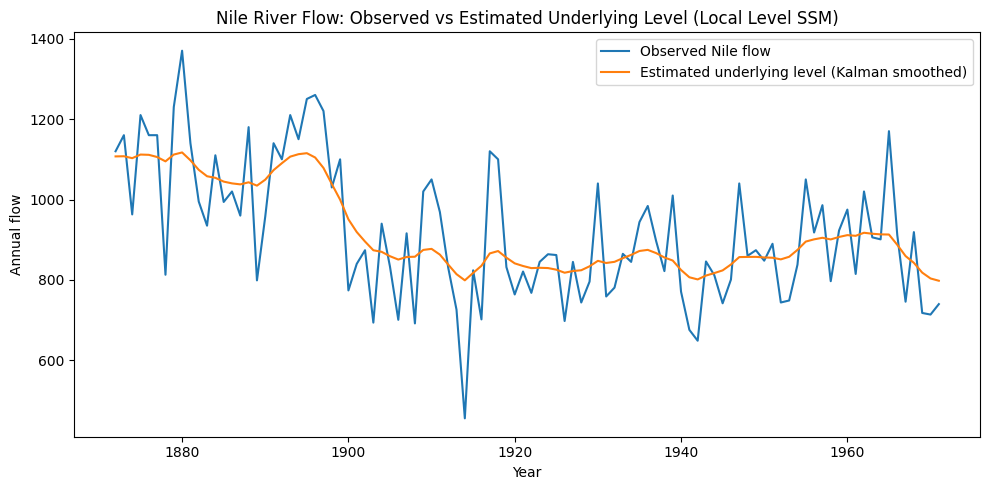

In [4]:
# State-Space Models in Practice:
# 1) Nile River (Local Level SSM)
# 2) U.S. Real GDP (Local Linear Trend + Cycle)
#
# Outputs three figures:
#   - Nile: observed vs smoothed level
#   - GDP: observed vs smoothed trend
#   - GDP: smoothed cycle
# You can optionally save them by uncommenting the plt.savefig(...) lines.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# -----------------------------
# 1) Nile River: Local Level SSM
# -----------------------------
nile = sm.datasets.nile.load_pandas().data.copy()
# Build a proper annual time index
nile.index = pd.PeriodIndex(nile['year'].astype(int), freq='Y').to_timestamp(how='end')
y_nile = nile['volume'].astype(float)

# Local level model (random-walk level + observation noise)
mod_nile = sm.tsa.UnobservedComponents(y_nile, level='local level')
res_nile = mod_nile.fit(disp=False)

# Smoothed level (underlying state estimate)
try:
    level_smoothed = res_nile.level['smoothed']  # available on recent statsmodels
except Exception:
    # Fallback: take first row of smoothed_state matrix
    level_smoothed = pd.Series(
        res_nile.filter_results.smoothed_state[0],
        index=y_nile.index,
        name="level_smoothed"
    )

# Plot: Observed vs Smoothed Level
plt.figure(figsize=(10, 5))
plt.plot(y_nile.index, y_nile.values, label="Observed Nile flow")
plt.plot(y_nile.index, level_smoothed, label="Estimated underlying level (Kalman smoothed)")
plt.title("Nile River Flow: Observed vs Estimated Underlying Level (Local Level SSM)")
plt.xlabel("Year")
plt.ylabel("Annual flow")
plt.legend()
plt.tight_layout()
# plt.savefig("nile_observed_vs_level.png", dpi=160)
plt.show()

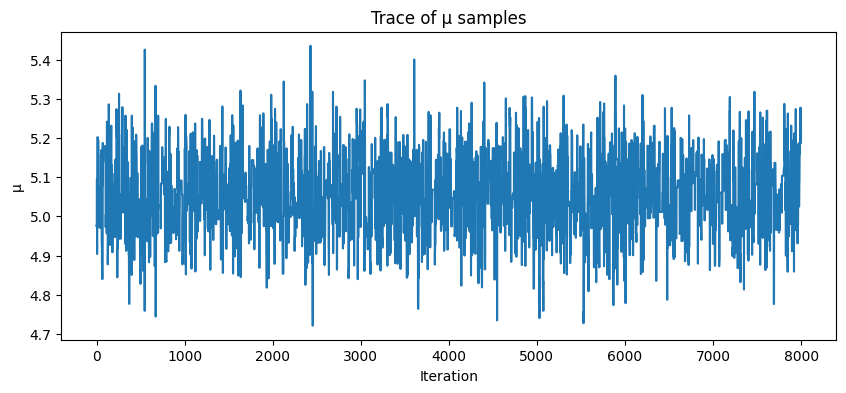

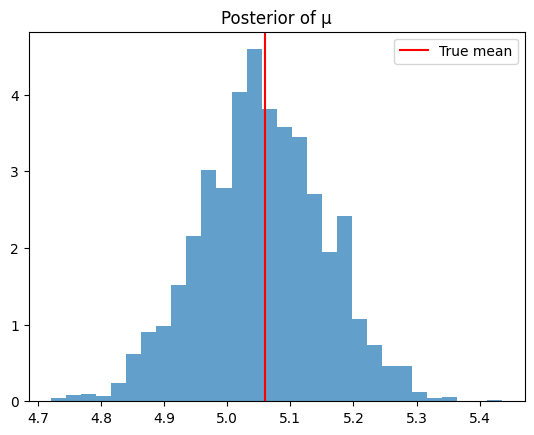

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# generate data
np.random.seed(0)
y = np.random.normal(5, 1, 100)

# log posterior (up to constant)
def log_posterior(mu):
    ll = -0.5 * np.sum((y - mu)**2)      # log-likelihood
    prior = -0.5 * (mu/10)**2            # log-prior
    return ll + prior

# MCMC sampler
N = 10000
chain = np.zeros(N)
mu_current = 0

for i in range(1, N):
    proposal = mu_current + np.random.normal(0, 0.5)
    accept_ratio = np.exp(log_posterior(proposal) - log_posterior(mu_current))
    if np.random.rand() < accept_ratio:
        mu_current = proposal
    chain[i] = mu_current

# discard burn-in
chain_burned = chain[2000:]

plt.figure(figsize=(10,4))
plt.plot(chain_burned)
plt.title("Trace of μ samples")
plt.xlabel("Iteration"); plt.ylabel("μ")
plt.show()

plt.figure()
plt.hist(chain_burned, bins=30, density=True, alpha=0.7)
plt.axvline(np.mean(y), color='r', label='True mean')
plt.legend(); plt.title("Posterior of μ")
plt.show()

